In [45]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [46]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [47]:
(X_train,Y_class_train),(X_test,Y_class_test) =  mnist.load_data()

In [48]:
X_train = X_train.reshape(X_train.shape[0],784).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255

In [49]:
Y_train = np_utils.to_categorical(Y_class_train,10)#바이너리화 과정
Y_test = np_utils.to_categorical(Y_class_test,10)

In [50]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [53]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor = 'val_loss',verboss=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [54]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

In [55]:
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9827

 Test Accuracy: 0.9827


In [56]:
y_vloss= history.history['val_loss']
y_loss = history.history['loss']

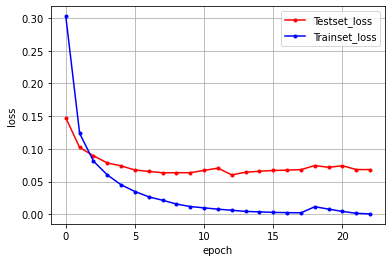

In [57]:
x_len = np.arange(len(y_loss))
plt.plot(x_len , y_vloss , marker = '.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()